# Stock Market Prediction

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import math

## 2. Input Parameters

### 2.1 Reading dataset's parameters

In [3]:
fileName='Alvand.Tile.csv'
stockType='IranStock'
look_back=1

### 2.2 training parameters

In [4]:
epoches=10
batch_sizes=32

## 3. Reading dataset

In [5]:
def readingDataset(fileName, stockType):
    
    if stockType=='IranStock':
        dataset=pd.read_csv(fileName, usecols=[2,3,4,5,7], engine='python')
        dataset = dataset.reindex(index = dataset.index[::-1])
        print('Shape of dataset: ', dataset.shape)
    
    if stockType=='Forex':
        dataset=pd.read_csv(fileName, usecols=[1,2,3,4,6], engine='python')
        dataset = dataset.reindex(index = dataset.index[::-1])
        print('Shape of dataset: ', dataset.shape)       
        
    return dataset

In [6]:
dataset=readingDataset(fileName, stockType)

Shape of dataset:  (2407, 5)


In [7]:
dataset.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VOL>
2406,6301.0,6301.0,6301.0,6301.0,1791
2405,6302.0,6302.0,6302.0,6302.0,938
2404,6303.0,6303.0,6303.0,6303.0,2000
2403,6321.0,6400.0,6321.0,6400.0,2620
2402,6400.0,6400.0,6399.0,6400.0,4175


### 3.1 Split dataset to train and test

In [8]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
print(train_size, test_size)

1684 723


In [9]:
datasetTrain = dataset[0:train_size]
datasetTrain.shape

(1684, 5)

In [10]:
datasetTest = dataset[train_size:]
datasetTest.shape

(723, 5)

### 3.2 Normalize data

In [11]:
def funcNormalize(data):
    scalar = MinMaxScaler()
    data=scalar.fit_transform(data)
    return data

In [12]:
datasetTrain = funcNormalize(datasetTrain)
datasetTest = funcNormalize(datasetTest)

### 3.3 Creating dataset

In [13]:
def generateDataset (data, look_back):
    
    x=[]
    y=[]
    
    for i in range(look_back, data.shape[0]):
        x.append(data[i-look_back:i])
        y.append(data[i,0])
        
    x, y = np.array(x), np.array(y)
        
    return x, y   

In [14]:
xtrain, ytrain = generateDataset (datasetTrain, 30)
xtest, ytest = generateDataset (datasetTest, 30)

In [15]:
print('shape of xtrain: ', xtrain.shape, ' and shape of ytrain: ',  ytrain.shape)
print('shape of xtest: ', xtest.shape, ' and shape of ytest: ',  ytest.shape)

shape of xtrain:  (1654, 30, 5)  and shape of ytrain:  (1654,)
shape of xtest:  (693, 30, 5)  and shape of ytest:  (693,)


## 4. LSTM Model

### 4.1 Creating model

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(xtrain.shape[1],xtrain.shape[2]),return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(60, activation='relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(80, activation='relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

### 4.2 Compile the model

In [18]:
model.compile(optimizer='adam',loss='mse')

### 4.3 train the model

In [19]:
history=model.fit(xtrain, ytrain, epochs=10, batch_size=32)

Epoch 1/10
52/52 [==============================] - 9s 174ms/step - loss: 0.0551
Epoch 2/10
52/52 [==============================] - 9s 178ms/step - loss: 0.0064
Epoch 3/10
52/52 [==============================] - 9s 177ms/step - loss: 0.0032
Epoch 4/10
52/52 [==============================] - 12s 230ms/step - loss: 0.0028
Epoch 5/10
52/52 [==============================] - 12s 222ms/step - loss: 0.0028
Epoch 6/10
52/52 [==============================] - 10s 197ms/step - loss: 0.0025
Epoch 7/10
52/52 [==============================] - 9s 179ms/step - loss: 0.0021
Epoch 8/10
52/52 [==============================] - 10s 189ms/step - loss: 0.0022
Epoch 9/10
52/52 [==============================] - 10s 200ms/step - loss: 0.0019
Epoch 10/10
52/52 [==============================] - 10s 184ms/step - loss: 0.0023


### 4.4 Evaluate model on training dataset

In [20]:
trainPredict = model.predict(xtrain)
trainPredict[:,0]

array([0.22815406, 0.22662073, 0.22517154, ..., 0.02888656, 0.02824016,
       0.02760303], dtype=float32)

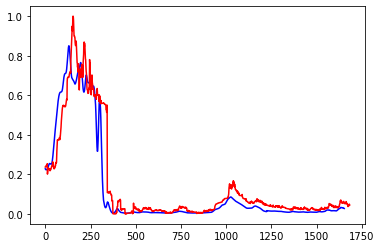

In [21]:
plt.plot(trainPredict, 'blue')
plt.plot(datasetTrain[:,0], 'red')
plt.show()

### 4.5 Evaluate model on test ataset

In [22]:
testPredict = model.predict(xtest)

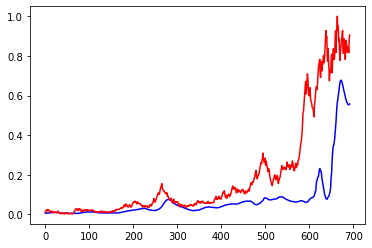

In [23]:
plt.plot(testPredict[:,0], 'blue')
plt.plot(ytest, 'red')
plt.show()

## 5. Future Prediction

In [ ]:
dataFuture=dataset[len(dataset)-look_back:len(dataset)]
dataFuture=funcNormalize(dataFuture)
dataFuture.shape

In [ ]:
xFuture=[]
yy=[]
for i in range(look_back, dataFuture.shape[0]):
    xFuture.append(dataFuture[i-look_back:i])
    #yy.append(dataFuture[i,0])

xFuture = np.array(xFuture) 
#yy = np.array(yy) 

xFuture.shape

In [ ]:
#xFuture=np.expand_dims(xFuture, axis=0)
#xFuture.shape

In [ ]:
yFuture=model.predict(xFuture)
print('Last day value is: ', xFuture[0,59,0])
print('Next day value is: ', yFuture[0,0])

In [ ]:
yFuture

In [ ]:
yy